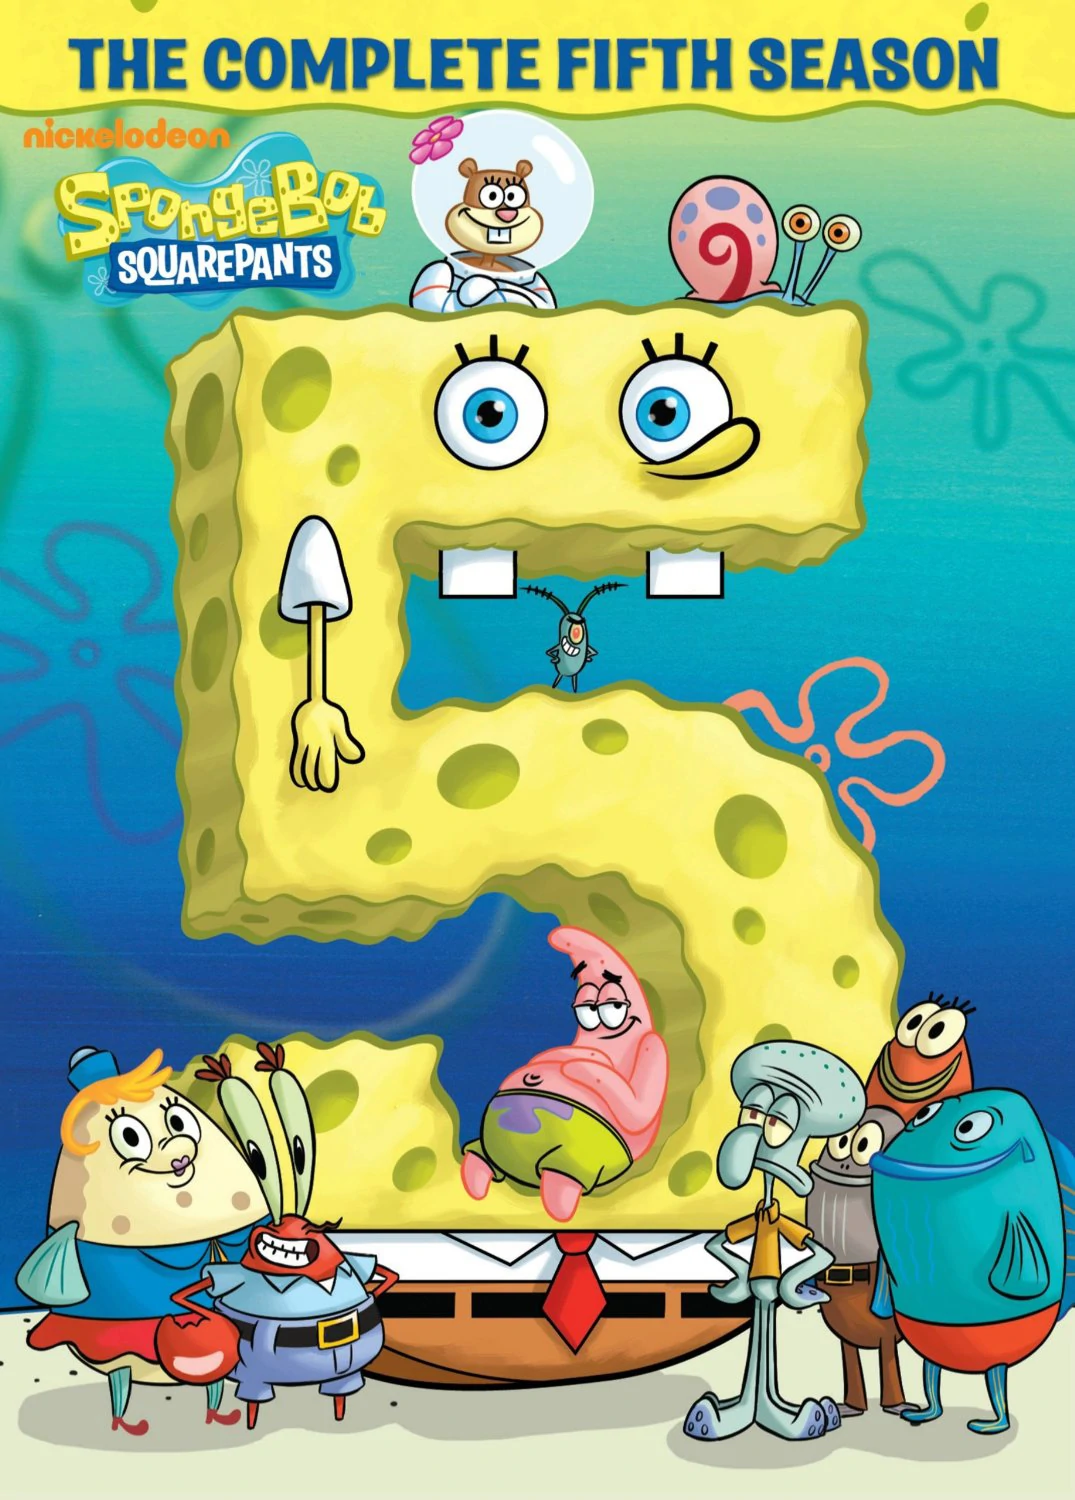

*This notebook contains an excerpt from the [Whirlwind Tour of Python](http://www.oreilly.com/programming/free/a-whirlwind-tour-of-python.csp) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/WhirlwindTourOfPython).*

*The text and code are released under the [CC0](https://github.com/jakevdp/WhirlwindTourOfPython/blob/master/LICENSE) license; see also the companion project, the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook).*


# Modules and Packages

## Loading Modules: the ``import`` Statement

For loading built-in and third-party modules, Python provides the ``import`` statement.
There are a few ways to use the statement, which we will mention briefly here, from most recommended to least recommended.

### Explicit module import

Explicit import of a module preserves the module's content in a namespace.
The namespace is then used to refer to its contents with a "``.``" between them.
For example:

In [1]:
import math
math.sin(math.pi/2)

1.0

### Explicit module import by alias

For longer module names, it's not convenient to use the full module name each time you access some element.
For this reason, we'll commonly use the "``import ... as ...``" pattern to create a shorter alias for the namespace.

In [2]:
import numpy as np
np.sin(np.pi/2)

1.0

### Explicit import of module contents

Sometimes rather than importing the module namespace, you would just like to import a few particular items from the module.
This can be done with the "``from ... import ...``" pattern.
For example, we can import just the ``cos`` function and the ``pi`` constant from the ``math`` module:

In [3]:
from math import cos, pi
cos(pi)

-1.0

### Implicit import of module contents

Finally, it is sometimes useful to import the entirety of the module contents into the local namespace.
This can be done with the "``from ... import *``" pattern:

In [4]:
from math import *
sin(pi) ** 2 + cos(pi) ** 2

1.0

This pattern should be used sparingly, if at all.
The problem is that such imports can sometimes overwrite function names that you do not intend to overwrite, and the implicitness of the statement makes it difficult to determine what has changed.


## Importing from Python's Standard Library

Python's standard library contains many useful built-in modules, which you can read about fully in [Python's documentation](https://docs.python.org/3/library/).
Any of these can be imported with the ``import`` statement, and then explored using the help function seen in the previous section.
Here is an extremely incomplete list of some of the modules you might wish to explore and learn about:

- ``os`` and ``sys``: Tools for interfacing with the operating system, including navigating file directory structures and executing shell commands
- ``math`` and ``cmath``: Mathematical functions and operations on real and complex numbers
- ``itertools``: Tools for constructing and interacting with iterators and generators
- ``functools``: Tools that assist with functional programming
- ``random``: Tools for generating pseudorandom numbers
- ``pickle``: Tools for object persistence: saving objects to and loading objects from disk
- ``json`` and ``csv``: Tools for reading JSON-formatted and CSV-formatted files.
- ``urllib``: Tools for doing HTTP and other web requests.

You can find information on these, and many more, in the Python standard library documentation: https://docs.python.org/3/library/.

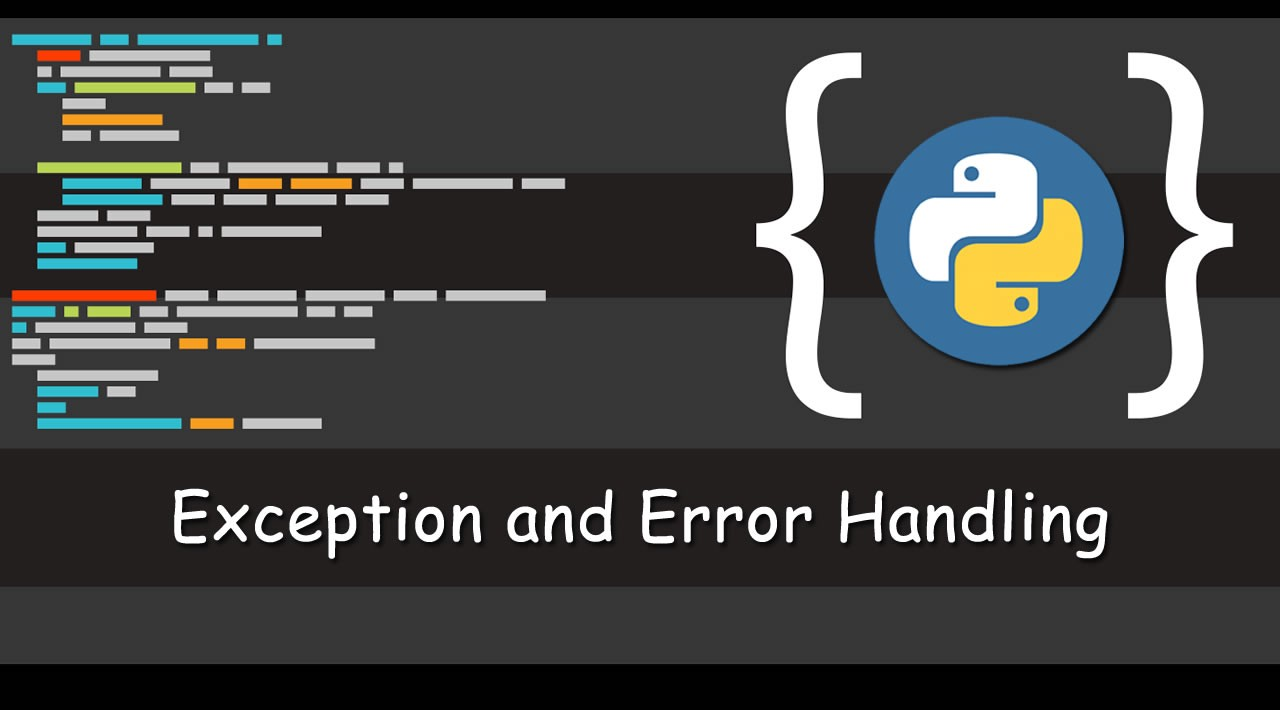

# Errors and Exception Handling

In this lecture we will learn about Errors and Exception Handling in Python. You've definitely already encountered errors by this point in the course. For example:

In [5]:
print('Hello)

SyntaxError: EOL while scanning string literal (1679058590.py, line 1)

This is known as an Exception. Even if a statement or expression is syntactically correct, it may cause an error when an attempt is made to execute it. Errors detected during execution are called exceptions.

You can check out the full list of built-in exceptions [here](https://docs.python.org/3/library/exceptions.html). Now let's learn how to handle errors and exceptions in our own code.

## try and except

The basic terminology and syntax used to handle errors in Python are the <code>try</code> and <code>except</code> statements. The code which can cause an exception to occur is put in the <code>try</code> block and the handling of the exception is then implemented in the <code>except</code> block of code. The syntax follows:

    try:
       You do your operations here...
       ...
    except ExceptionI:
       If there is ExceptionI, then execute this block.
    except ExceptionII:
       If there is ExceptionII, then execute this block.
       ...
    else:
       If there is no exception, then execute this block. 

We can also just check for any exception with just using <code>except:</code> To get a better understanding of all this let's check out an example.

In [6]:
try:
    f = open('testfile','w')
    f.write('Test write this')
except IOError:
    # This will only check for an IOError exception
    print("Error: Could not find file or read data")
else:
    print("Content written successfully")
    f.close()

Content written successfully


Now let's see what would happen if we did not have write permission (opening only with 'r'):

In [7]:
try:
    f = open('testfile','r')
    f.write('Test write this')
except IOError:
    # This will only check for an IOError exception
    print("Error: Could not find file or read data")
else:
    print("Content written successfully")
    f.close()

Error: Could not find file or read data


We could have also just said <code>except:</code> if we weren't sure what exception would occur. For example:

In [8]:
try:
    f = open('testfile','r')
    f.write('Test write this')
except:
    # This will check for any exception
    print("Error: Could not find file or read data")
else:
    print("Content written successfully")
    f.close()

Error: Could not find file or read data


Now we don't actually need to memorize that list of exception types! What if we kept wanting to run code after the exception occurred? This is where <code>finally</code> comes in.
## finally
The <code>finally:</code> block of code will always be run regardless if there was an exception in the <code>try</code> code block. The syntax is:

    try:
       Code block here
       ...
       Due to any exception, this code may be skipped!
    finally:
       This code block would always be executed.

For example:

In [9]:
try:
    f = open("testfile", "w")
    f.write("Test write statement")
    f.close()
finally:
    print("This will always execute.")

This will always execute.


We can use this in conjunction with <code>except</code>. Let's see a new example that will take into account a user providing the wrong input:

In [10]:
def askint():
    try:
        val = int(input("Please enter an integer: "))
    except:
        print("Looks like you did not enter an integer!")
    finally:
        print("Finally, I executed!")
    print(val)

In [11]:
askint()

Please enter an integer: pizza
Looks like you did not enter an integer!
Finally, I executed!


UnboundLocalError: local variable 'val' referenced before assignment

How can we continually keep checking for an exception? Use a while loop!

In [12]:
def askint():
    while True:
        try:
            val = int(input("Please enter an integer: "))
        except:
            print("Looks like you did not enter an integer!")
            continue
        else:
            print("Yep that's an integer!")
            break
    print(val)

In [13]:
askint()

Please enter an integer: pizza
Looks like you did not enter an integer!
Please enter an integer: pizza
Looks like you did not enter an integer!
Please enter an integer: 3
Yep that's an integer!
3


**Great! Now you know how to handle errors and exceptions in Python with the try, except, else, and finally notation!**

# Errors and Exceptions Homework

### Problem 1
Handle the exception thrown by the code below by using <code>try</code> and <code>except</code> blocks.

In [8]:
try:
    for i in ['a','b','c']:    
        print(i**2)
except:
    print('You cannot operate on the input')

You cannot operate on the input


### Problem 2
Handle the exception thrown by the code below by using <code>try</code> and <code>except</code> blocks. Then use a <code>finally</code> block to print 'All Done.'

In [4]:
x = 5
y = 0
try:
    z = x/y
except ZeroDivisionError:
    print('This function is not possible')
finally:
    print('All Done')

This function is not possible
All Done


### Problem 3
Write a function that asks for an integer and prints the square of it. Use a <code>while</code> loop with a <code>try</code>, <code>except</code>, <code>else</code> block to account for incorrect inputs.

In [10]:
def ask():
    while True:
        try:
            val = int(input('Please enter an integer: '))
            val_square = val**2
        except:
            print('You did not enter an integer, try again')
            continue
        else:
            print('Yay! The number you entered was', val)
            print('The square of your number is', val **2)
            break

In [11]:
ask()

Please enter an integer: 9\
You did not enter an integer, try again
Please enter an integer: 9
Yay! The number you entered was 9
The square of your number is 81


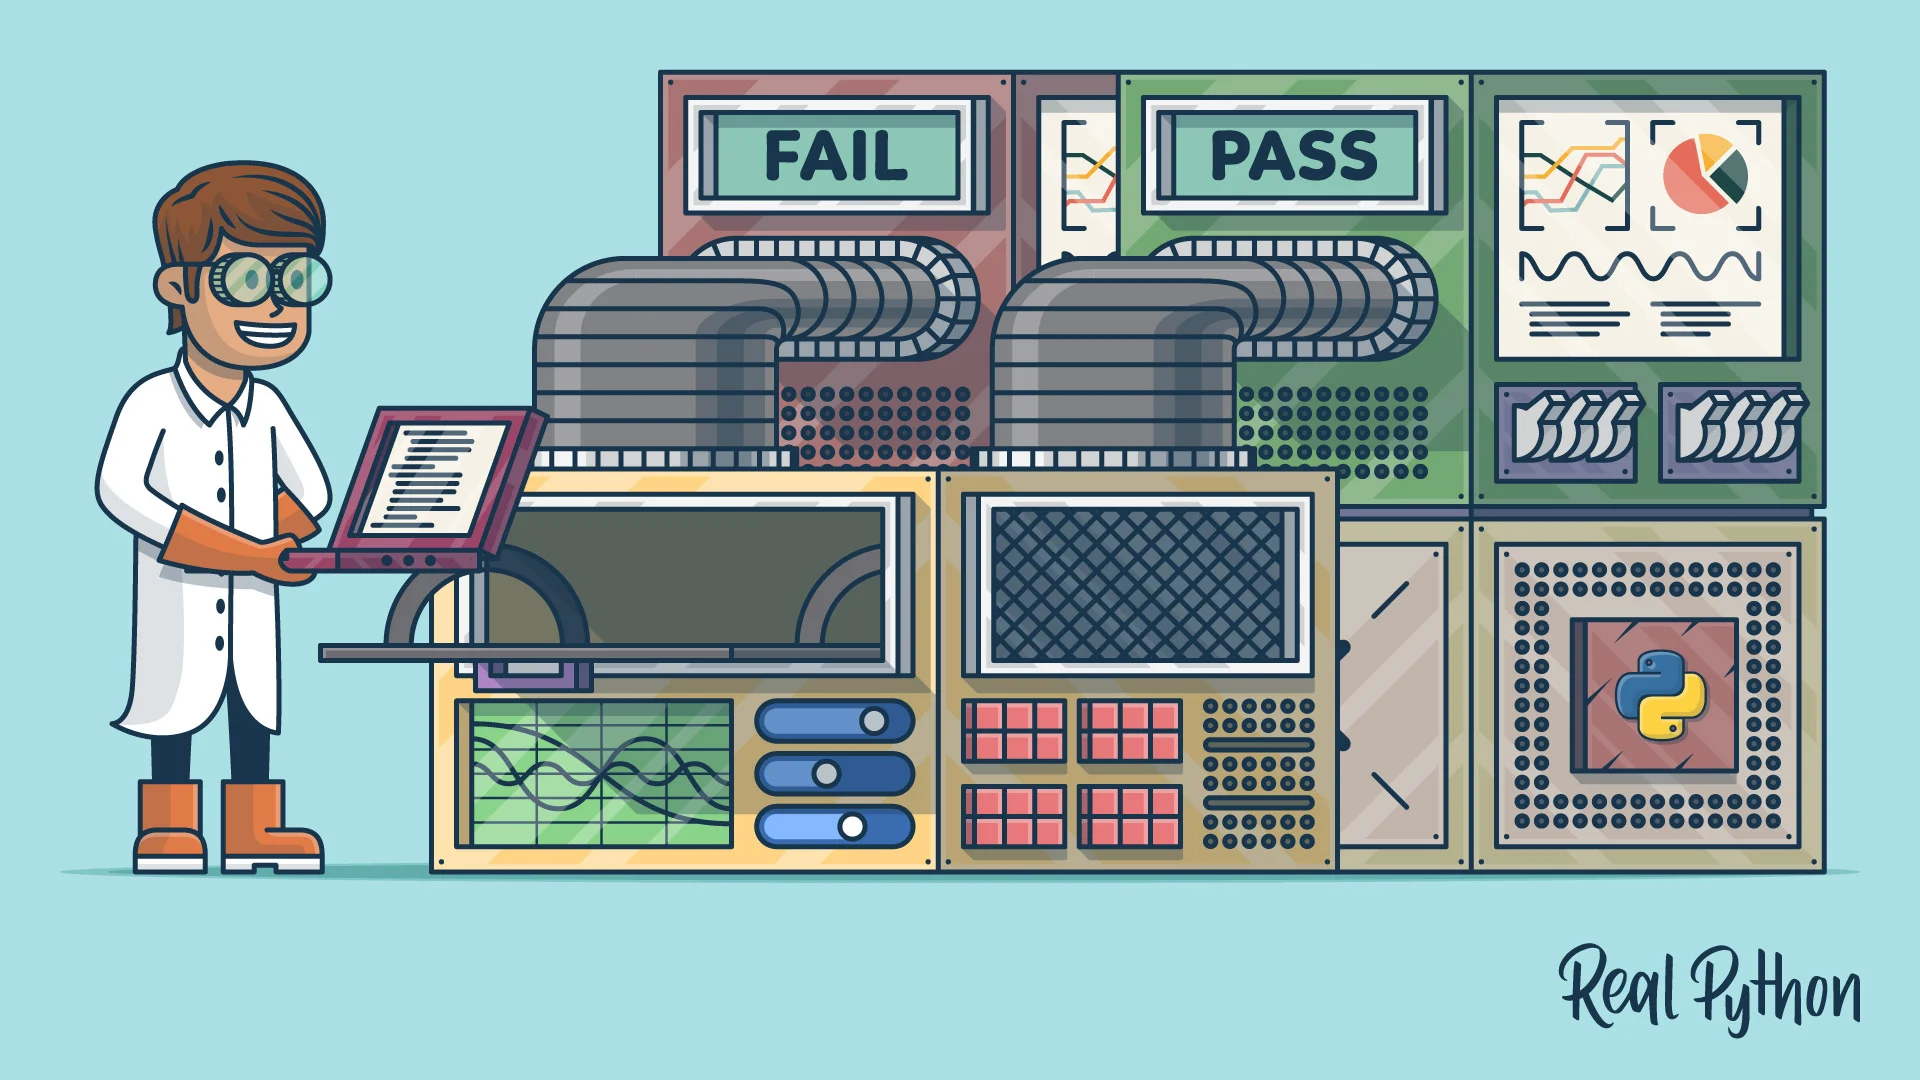

# Unit Testing

Equally important as writing good code is writing good tests. Better to find bugs yourself than have them reported to you by end users!

For this section we'll be working with files outside the notebook. We'll save our code to a .py file, and then save our test script to another .py file. Normally we would code these files using a text editor like Brackets or Atom, or inside an IDE like Spyder or Pycharm. But, since we're here, let's use Jupyter!

Recall that with some IPython magic we can write the contents of a cell to a file using `%%writefile`.<br>
#### Something we haven't seen yet; you can run terminal commands from a jupyter cell using `!`

## Testing tools

There are dozens of good testing libraries out there. Most are third-party packages that require an install, such as:

* [pylint](https://www.pylint.org/)
* [pyflakes](https://pypi.python.org/pypi/pyflakes/)
* [pep8](https://pypi.python.org/pypi/pep8)

These are simple tools that merely look at your code, and they'll tell you if there are style issues or simple problems like variable names being called before assignment.

A far better way to test your code is to write tests that send sample data to your program, and compare what's returned to a desired outcome.<br>Two such tools are available from the standard library:

* [unittest](https://docs.python.org/3/library/unittest.html)
* [doctest](https://docs.python.org/3/library/doctest.html)

Let's look at pylint first, then we'll do some heavier lifting with unittest.


## `pylint`

`pylint` tests for style as well as some very basic program logic.

First, if you don't have it already (and you probably do, as it's part of the Anaconda distribution), you should install `pylint`.<br>Once that's done feel free to comment out the cell, you won't need it anymore.

In [16]:
! pip install pylint --user

Let's save a very simple script:

In [17]:
%%writefile simple1Part4.py
a = 1
b = 2
print(a)
print(B)

Overwriting simple1Part4.py


Now let's check it using pylint

In [18]:
! pylint simple1Part4.py

************* Module simple1Part4
simple1Part4.py:1:0: C0103: Module name "simple1Part4" doesn't conform to snake_case naming style (invalid-name)
simple1Part4.py:1:0: C0114: Missing module docstring (missing-module-docstring)
simple1Part4.py:1:0: C0103: Constant name "a" doesn't conform to UPPER_CASE naming style (invalid-name)
simple1Part4.py:2:0: C0103: Constant name "b" doesn't conform to UPPER_CASE naming style (invalid-name)
simple1Part4.py:4:6: E0602: Undefined variable 'B' (undefined-variable)

----------------------------------------------------------------------

Your code has been rated at -12.50/10 (previous run: -12.50/10, +0.00)





Pylint first lists some styling issues - poor module naming, modules and function definitions should have descriptive docstrings, and single characters are a poor choice for variable names.

More importantly, however, pylint identified an error in the program - a variable called before assignment. This needs fixing.

Note that pylint scored our program a 0.0 out of 10.

In [19]:
%%writefile simple1_part4.py
"""
A very simple script.
"""

def myfunc():
    ''' A simple example'''
    first = 1
    second = 2
    print(first)
    print(second)

myfunc()

Writing simple1_part4.py


In [23]:
! pylint simple1_part4.py


--------------------------------------------------------------------

Your code has been rated at 10.00/10 (previous run: 10.00/10, +0.00)





Much better! Our score climbed to 10 out of 10. Pylint helped us troubleshoot some of our problems. But what if the problem was more complex?

In [21]:
%%writefile simple2_part4.py
"""
A very simple script.
"""

def myfunc():
    ''' A simple example'''
    first = 1
    second = 2
    print(first)
    print('second')

myfunc()

Writing simple2_part4.py


In [24]:
! pylint simple2_part4.py

************* Module simple2_part4
simple2_part4.py:8:4: W0612: Unused variable 'second' (unused-variable)

------------------------------------------------------------------

Your code has been rated at 8.33/10 (previous run: 8.33/10, +0.00)





pylint tells us there's an unused variable in line 10, but it doesn't know that we might get an unexpected output from line 12! For this we need a more robust set of tools. That's where `unittest` comes in.

## `unittest`
`unittest` lets you write your own test programs. The goal is to send a specific set of data to your program, and analyze the returned results against an expected result. 

Let's generate a simple script that capitalizes words in a given string. We'll call it **cap_part4.py**.

In [21]:
%%writefile cap_part4.py
def cap_text(text):
    return text.capitalize()

Overwriting cap_part4.py


Now we'll write a test script. We can call it whatever we want, but **test_cap_part4.py** seems an obvious choice.

When writing test functions, it's best to go from simple to complex, as each function will be run in order. Here we'll test simple, one-word strings, followed by a test of multiple word strings.

In [22]:
%%writefile test_cap_part4.py
import unittest
import cap_part4

class TestCap(unittest.TestCase):
    
    def test_one_word(self):
        text = 'python'
        result = cap_part4.cap_text(text)
        self.assertEqual(result, 'Python')
        
    def test_multiple_words(self):
        text = 'monty python'
        result = cap_part4.cap_text(text)
        self.assertEqual(result, 'Monty Python')
        
if __name__ == '__main__':
    unittest.main()

Overwriting test_cap_part4.py


In [23]:
! python test_cap_part4.py

F.
FAIL: test_multiple_words (__main__.TestCap)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "test_cap_part4.py", line 14, in test_multiple_words
    self.assertEqual(result, 'Monty Python')
AssertionError: 'Monty python' != 'Monty Python'
- Monty python
?       ^
+ Monty Python
?       ^


----------------------------------------------------------------------
Ran 2 tests in 0.001s

FAILED (failures=1)


What happened? It turns out that the `.capitalize()` method only capitalizes the first letter of the first word in a string. Doing a little research on string methods, we find that `.title()` might give us what we want.

In [24]:
%%writefile cap_part4.py
def cap_text(text):
    return text.title()  # replace .capitalize() with .title()

Overwriting cap_part4.py


In [25]:
! python test_cap_part4.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.000s

OK


Hey, it passed! But have we tested all cases? Let's add another test to **test_cap.py** to see if it handles words with apostrophes, like *don't*.

In a text editor this would be easy, but in Jupyter we have to start from scratch.

In [26]:
%%writefile test_cap_part4.py
import unittest
import cap_part4

class TestCap(unittest.TestCase):
    
    def test_one_word(self):
        text = 'python'
        result = cap_part4.cap_text(text)
        self.assertEqual(result, 'Python')
        
    def test_multiple_words(self):
        text = 'monty python'
        result = cap_part4.cap_text(text)
        self.assertEqual(result, 'Monty Python')
        
    def test_with_apostrophes(self):
        text = "monty python's flying circus"
        result = cap_part4.cap_text(text)
        self.assertEqual(result, "Monty Python's Flying Circus")
        
if __name__ == '__main__':
    unittest.main()

Overwriting test_cap_part4.py


In [27]:
! python test_cap_part4.py

..F
FAIL: test_with_apostrophes (__main__.TestCap)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "test_cap_part4.py", line 19, in test_with_apostrophes
    self.assertEqual(result, "Monty Python's Flying Circus")
AssertionError: "Monty Python'S Flying Circus" != "Monty Python's Flying Circus"
- Monty Python'S Flying Circus
?              ^
+ Monty Python's Flying Circus
?              ^


----------------------------------------------------------------------
Ran 3 tests in 0.001s

FAILED (failures=1)


Now we have to find a solution that handles apostrophes! There is one (look up `capwords` from the `string` module) but we'll leave that as an exercise for the reader.